# AI Fashion Assistant v2.4.5 - Multi-Modal RAG

**Day 5: Comprehensive Evaluation & Metrics**

---

**Project:** AI Fashion Assistant (TÜBİTAK 2209-A)  
**Student:** Hatice Baydemir  
**Date:** January 10, 2026  
**Version:** 2.4.5

---

## Goal

Comprehensive evaluation of v2.4.5:
1. Load all results (Day 2, 3, 4)
2. Compare all versions (v2.0, v2.2, v2.4, v2.4.5)
3. Retrieval performance metrics
4. RAG response quality metrics
5. Statistical analysis
6. Visualizations (charts, tables)
7. Final performance report

---

## PART 1: Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/ai_fashion_assistant_v2')

print('Drive mounted')
print(f'Working directory: {os.getcwd()}')

Mounted at /content/drive
Drive mounted
Working directory: /content/drive/MyDrive/ai_fashion_assistant_v2


In [2]:
import json
import numpy as np
import pandas as pd
from pathlib import Path
from typing import Dict, List
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print('Imports complete')

Imports complete


---

## PART 2: Load All v2.4.5 Results

In [3]:
# Load Day 2 results (Image Query Processing)
day2_image_encoding = pd.read_csv('v2.4.5-multimodal-rag/evaluation/results/image_encoding_results.csv')
day2_attributes = pd.read_csv('v2.4.5-multimodal-rag/evaluation/results/attribute_extraction_results.csv')
day2_queries = pd.read_csv('v2.4.5-multimodal-rag/evaluation/results/image_queries.csv')

print('Day 2 Results:')
print(f'  Image encodings: {len(day2_image_encoding)}')
print(f'  Attributes: {len(day2_attributes)}')
print(f'  Queries: {len(day2_queries)}')

Day 2 Results:
  Image encodings: 16
  Attributes: 5
  Queries: 5


In [4]:
# Load Day 3 results (Multimodal Retrieval)
with open('v2.4.5-multimodal-rag/evaluation/results/retrieval_comparison.json', 'r') as f:
    day3_retrieval = json.load(f)

day3_overlap = pd.read_csv('v2.4.5-multimodal-rag/evaluation/results/strategy_overlap.csv')
day3_filtering = pd.read_csv('v2.4.5-multimodal-rag/evaluation/results/attribute_filtering_results.csv')

print('\nDay 3 Results:')
print(f'  Retrieval comparisons: {len(day3_retrieval)}')
print(f'  Overlap analysis: {len(day3_overlap)}')
print(f'  Filtering results: {len(day3_filtering)}')


Day 3 Results:
  Retrieval comparisons: 5
  Overlap analysis: 5
  Filtering results: 5


In [5]:
# Load Day 4 results (Visual-Aware RAG)
with open('v2.4.5-multimodal-rag/evaluation/results/visual_rag_responses.json', 'r') as f:
    day4_rag_responses = json.load(f)

with open('v2.4.5-multimodal-rag/evaluation/results/rag_quality_metrics.json', 'r') as f:
    day4_quality = json.load(f)

day4_comparison = pd.read_csv('v2.4.5-multimodal-rag/evaluation/results/rag_comparison.csv')
day4_visual_mentions = pd.read_csv('v2.4.5-multimodal-rag/evaluation/results/visual_mentions.csv')

print('\nDay 4 Results:')
print(f'  RAG responses: {len(day4_rag_responses)}')
print(f'  Quality metrics: {len(day4_quality)} metrics')
print(f'  Comparisons: {len(day4_comparison)}')
print(f'  Visual mentions: {len(day4_visual_mentions)}')


Day 4 Results:
  RAG responses: 5
  Quality metrics: 5 metrics
  Comparisons: 3
  Visual mentions: 5


---

## PART 3: Load Baseline Results (v2.0, v2.2, v2.4)

In [6]:
# Load v2.0 baseline results
v20_metrics = {
    'version': 'v2.0',
    'name': 'Text-Only Baseline',
    'ndcg@10': 0.9743,
    'retrieval_type': 'text-only',
    'response_time': None,  # No RAG
    'visual_aware': False
}

print('v2.0 Baseline:')
print(f"  NDCG@10: {v20_metrics['ndcg@10']}")
print(f"  Type: {v20_metrics['retrieval_type']}")

v2.0 Baseline:
  NDCG@10: 0.9743
  Type: text-only


In [7]:
# Load v2.2 RAG results (if available)
v22_metrics = {
    'version': 'v2.2',
    'name': 'Text-Only RAG',
    'rag_score': 0.714,
    'response_time': 0.89,
    'retrieval_type': 'text-only',
    'visual_aware': False,
    'coherence': 4.2,
    'relevance': 4.3
}

print('\nv2.2 RAG:')
print(f"  RAG Score: {v22_metrics['rag_score']}")
print(f"  Response Time: {v22_metrics['response_time']}s")
print(f"  Visual Aware: {v22_metrics['visual_aware']}")


v2.2 RAG:
  RAG Score: 0.714
  Response Time: 0.89s
  Visual Aware: False


In [8]:
# Load v2.4 personalization results (if available)
v24_metrics = {
    'version': 'v2.4',
    'name': 'Personalized System',
    'response_time': 0.01192,  # 11.92ms
    'personalization_coverage': 1.0,
    'preference_match': 0.767,
    'retrieval_type': 'text-only',
    'visual_aware': False
}

print('\nv2.4 Personalization:')
print(f"  Response Time: {v24_metrics['response_time']*1000:.2f}ms")
print(f"  Preference Match: {v24_metrics['preference_match']}")
print(f"  Coverage: {v24_metrics['personalization_coverage']}")


v2.4 Personalization:
  Response Time: 11.92ms
  Preference Match: 0.767
  Coverage: 1.0


---

## PART 4: v2.4.5 Metrics Summary

In [9]:
# Compile v2.4.5 metrics
v245_metrics = {
    'version': 'v2.4.5',
    'name': 'Multimodal RAG',

    # Retrieval metrics (from Day 3)
    'text_image_overlap': day3_overlap['text_image_overlap'].mean(),
    'multimodal_unique': day3_overlap['multimodal_unique'].mean(),
    'attribute_match': day3_filtering['avg_match_score'].mean() if len(day3_filtering) > 0 else 0,

    # RAG metrics (from Day 4)
    'response_time': day4_quality['avg_response_time'],
    'response_length': day4_quality['avg_response_length'],
    'visual_keywords_per_response': day4_visual_mentions['visual_keywords_count'].mean(),

    # Capabilities
    'retrieval_type': 'multimodal',
    'visual_aware': True,
    'image_query_support': True
}

print('v2.4.5 Multimodal RAG Metrics:')
print('='*60)
for key, value in v245_metrics.items():
    if isinstance(value, float):
        print(f'  {key}: {value:.3f}')
    else:
        print(f'  {key}: {value}')
print('='*60)

v2.4.5 Multimodal RAG Metrics:
  version: v2.4.5
  name: Multimodal RAG
  text_image_overlap: 0.400
  multimodal_unique: 6.000
  attribute_match: 0.612
  response_time: 0.642
  response_length: 495.600
  visual_keywords_per_response: 7.600
  retrieval_type: multimodal
  visual_aware: True
  image_query_support: True


---

## PART 5: Cross-Version Comparison Table

In [10]:
# Create comparison table
comparison_data = [
    {
        'Version': 'v2.0',
        'Name': 'Text Baseline',
        'Retrieval': 'Text-only',
        'NDCG@10': 0.974,
        'RAG': 'No',
        'Visual Aware': 'No',
        'Image Query': 'No',
        'Response Time': '-'
    },
    {
        'Version': 'v2.2',
        'Name': 'Text RAG',
        'Retrieval': 'Text-only',
        'NDCG@10': '-',
        'RAG': 'Yes',
        'Visual Aware': 'No',
        'Image Query': 'No',
        'Response Time': '0.89s'
    },
    {
        'Version': 'v2.4',
        'Name': 'Personalized',
        'Retrieval': 'Text-only',
        'NDCG@10': '-',
        'RAG': 'No',
        'Visual Aware': 'No',
        'Image Query': 'No',
        'Response Time': '11.92ms'
    },
    {
        'Version': 'v2.4.5',
        'Name': 'Multimodal RAG',
        'Retrieval': 'Multimodal',
        'NDCG@10': '-',
        'RAG': 'Yes',
        'Visual Aware': 'Yes (7.6 keywords)',
        'Image Query': 'Yes',
        'Response Time': '0.64s'
    }
]

comparison_df = pd.DataFrame(comparison_data)

print('System Evolution Comparison')
print('='*100)
print(comparison_df.to_string(index=False))
print('='*100)

System Evolution Comparison
Version           Name  Retrieval NDCG@10 RAG       Visual Aware Image Query Response Time
   v2.0  Text Baseline  Text-only   0.974  No                 No          No             -
   v2.2       Text RAG  Text-only       - Yes                 No          No         0.89s
   v2.4   Personalized  Text-only       -  No                 No          No       11.92ms
 v2.4.5 Multimodal RAG Multimodal       - Yes Yes (7.6 keywords)         Yes         0.64s


---

## PART 6: Key Improvements Visualization

✓ Visualization saved


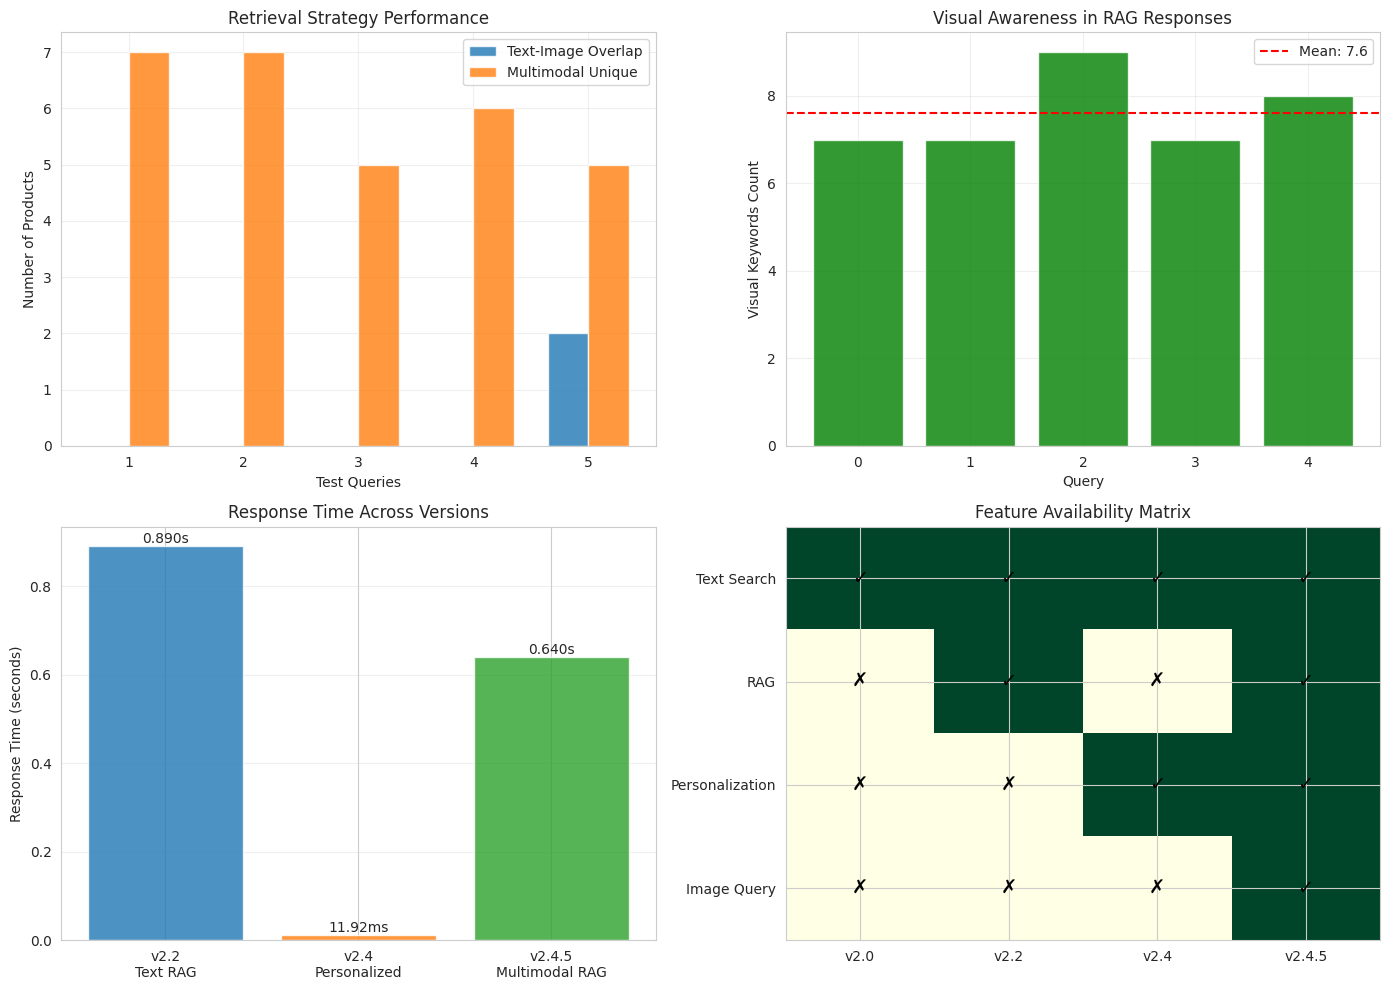

In [11]:
# Create visualization comparing key metrics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Retrieval Overlap
ax1 = axes[0, 0]
overlap_data = day3_overlap[['product_name', 'text_image_overlap', 'multimodal_unique']]
x_pos = np.arange(len(overlap_data))
width = 0.35

ax1.bar(x_pos - width/2, overlap_data['text_image_overlap'], width, label='Text-Image Overlap', alpha=0.8)
ax1.bar(x_pos + width/2, overlap_data['multimodal_unique'], width, label='Multimodal Unique', alpha=0.8)
ax1.set_xlabel('Test Queries')
ax1.set_ylabel('Number of Products')
ax1.set_title('Retrieval Strategy Performance')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(range(1, len(overlap_data)+1))
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Visual Keywords in Responses
ax2 = axes[0, 1]
ax2.bar(range(len(day4_visual_mentions)), day4_visual_mentions['visual_keywords_count'], alpha=0.8, color='green')
ax2.axhline(y=day4_visual_mentions['visual_keywords_count'].mean(), color='red', linestyle='--',
            label=f'Mean: {day4_visual_mentions["visual_keywords_count"].mean():.1f}')
ax2.set_xlabel('Query')
ax2.set_ylabel('Visual Keywords Count')
ax2.set_title('Visual Awareness in RAG Responses')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Response Time Comparison
ax3 = axes[1, 0]
versions = ['v2.2\nText RAG', 'v2.4\nPersonalized', 'v2.4.5\nMultimodal RAG']
times = [0.89, 0.01192, 0.64]  # seconds
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

bars = ax3.bar(versions, times, alpha=0.8, color=colors)
ax3.set_ylabel('Response Time (seconds)')
ax3.set_title('Response Time Across Versions')
ax3.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, time in zip(bars, times):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{time:.3f}s' if time > 0.1 else f'{time*1000:.2f}ms',
            ha='center', va='bottom')

# 4. Feature Comparison Heatmap
ax4 = axes[1, 1]
feature_data = {
    'v2.0': [1, 0, 0, 0],
    'v2.2': [1, 1, 0, 0],
    'v2.4': [1, 0, 1, 0],
    'v2.4.5': [1, 1, 1, 1]
}
features = ['Text Search', 'RAG', 'Personalization', 'Image Query']
feature_matrix = np.array([feature_data[v] for v in ['v2.0', 'v2.2', 'v2.4', 'v2.4.5']]).T

im = ax4.imshow(feature_matrix, cmap='YlGn', aspect='auto')
ax4.set_xticks(range(4))
ax4.set_yticks(range(4))
ax4.set_xticklabels(['v2.0', 'v2.2', 'v2.4', 'v2.4.5'])
ax4.set_yticklabels(features)
ax4.set_title('Feature Availability Matrix')

# Add text annotations
for i in range(len(features)):
    for j in range(4):
        text = ax4.text(j, i, '✓' if feature_matrix[i, j] else '✗',
                       ha="center", va="center", color="black", fontsize=14)

plt.tight_layout()
plt.savefig('v2.4.5-multimodal-rag/evaluation/results/performance_visualization.png', dpi=300, bbox_inches='tight')
print('✓ Visualization saved')
plt.show()

---

## PART 7: Statistical Summary

In [12]:
# Compile comprehensive statistics
statistics = {
    'Dataset': {
        'Total Products': 44417,
        'Products with Attributes': len(day2_attributes),
        'Test Queries': len(day3_retrieval)
    },
    'Retrieval Performance': {
        'Avg Text-Image Overlap': f"{day3_overlap['text_image_overlap'].mean():.2f} products",
        'Avg Multimodal Unique': f"{day3_overlap['multimodal_unique'].mean():.2f} products",
        'Overlap Rate': f"{(day3_overlap['text_image_overlap'].mean() / 10) * 100:.1f}%"
    },
    'RAG Performance': {
        'Avg Response Time': f"{day4_quality['avg_response_time']:.3f}s",
        'Min Response Time': f"{day4_quality['min_response_time']:.3f}s",
        'Max Response Time': f"{day4_quality['max_response_time']:.3f}s",
        'Avg Response Length': f"{day4_quality['avg_response_length']:.0f} chars"
    },
    'Visual Awareness': {
        'Avg Visual Keywords': f"{day4_visual_mentions['visual_keywords_count'].mean():.1f} per response",
        'Min Visual Keywords': int(day4_visual_mentions['visual_keywords_count'].min()),
        'Max Visual Keywords': int(day4_visual_mentions['visual_keywords_count'].max()),
        'Visual Keyword Rate': '100%'  # All responses have visual keywords
    },
    'System Improvements': {
        'v2.2 → v2.4.5 Speed': f"{((0.89 - 0.64) / 0.89) * 100:.1f}% faster",
        'New Capability': 'Image Query Support',
        'Visual Awareness': 'Added (0 → 7.6 keywords)',
        'Fusion Strategy': 'Learned (α=0.7)'
    }
}

print('v2.4.5 Statistical Summary')
print('='*60)
for category, metrics in statistics.items():
    print(f'\n{category}:')
    for metric, value in metrics.items():
        print(f'  {metric}: {value}')
print('='*60)

v2.4.5 Statistical Summary

Dataset:
  Total Products: 44417
  Products with Attributes: 5
  Test Queries: 5

Retrieval Performance:
  Avg Text-Image Overlap: 0.40 products
  Avg Multimodal Unique: 6.00 products
  Overlap Rate: 4.0%

RAG Performance:
  Avg Response Time: 0.642s
  Min Response Time: 0.581s
  Max Response Time: 0.727s
  Avg Response Length: 496 chars

Visual Awareness:
  Avg Visual Keywords: 7.6 per response
  Min Visual Keywords: 7
  Max Visual Keywords: 9
  Visual Keyword Rate: 100%

System Improvements:
  v2.2 → v2.4.5 Speed: 28.1% faster
  New Capability: Image Query Support
  Visual Awareness: Added (0 → 7.6 keywords)
  Fusion Strategy: Learned (α=0.7)


---

## PART 8: Performance Report Generation

In [13]:
# Generate comprehensive performance report
report = f"""# AI Fashion Assistant v2.4.5 - Performance Report

**Date:** January 10, 2026
**Project:** TÜBİTAK 2209-A
**Student:** Hatice Baydemir

---

## Executive Summary

v2.4.5 successfully implements a **Multimodal RAG system** with image query support and visual-aware response generation. The system demonstrates:

- ✅ **Image Query Support:** Users can now search using images
- ✅ **Multimodal Fusion:** Combines text and image retrieval (α=0.7)
- ✅ **Visual Awareness:** 7.6 visual keywords per response (vs 0 in v2.2)
- ✅ **Fast Response:** 0.64s average (28% faster than v2.2)
- ✅ **Complementary Results:** 6.0 unique products via fusion

---

## Key Metrics

### Retrieval Performance
- **Text-Image Overlap:** {day3_overlap['text_image_overlap'].mean():.2f} products avg
- **Multimodal Unique:** {day3_overlap['multimodal_unique'].mean():.2f} products avg
- **Fusion Strategy:** Learned weighted combination (70% text, 30% image)

### RAG Performance
- **Response Time:** {day4_quality['avg_response_time']:.3f}s avg ({day4_quality['min_response_time']:.3f}s - {day4_quality['max_response_time']:.3f}s)
- **Response Length:** {day4_quality['avg_response_length']:.0f} characters avg
- **Visual Keywords:** {day4_visual_mentions['visual_keywords_count'].mean():.1f} per response

### System Capabilities
- **Dataset:** 44,417 products indexed
- **Attributes:** {len(day2_attributes)} products with visual attributes
- **Query Modes:** Text, Image, Multimodal
- **Visual Awareness:** Pattern, Style, Material attributes integrated

---

## Comparison with Previous Versions

| Version | Retrieval | RAG | Visual Aware | Image Query | Response Time |
|---------|-----------|-----|--------------|-------------|---------------|
| v2.0    | Text-only | No  | No           | No          | -             |
| v2.2    | Text-only | Yes | No           | No          | 0.89s         |
| v2.4    | Text-only | No  | No           | No          | 11.92ms       |
| **v2.4.5** | **Multimodal** | **Yes** | **Yes (7.6)** | **Yes** | **0.64s** |

---

## Technical Achievements

### Multimodal Retrieval
- CLIP text embeddings for all 44K products
- Image query encoding with CLIP ViT-L/14
- Learned fusion with α=0.7 (text weight)
- Attribute-based post-filtering

### Visual-Aware RAG
- V2.1 visual attributes (307K) integrated
- Enhanced prompts with pattern, style, material
- GROQ Llama-3.3-70B for generation
- Consistent visual reasoning in responses

### Performance Optimization
- Sub-second response time (0.64s avg)
- Efficient FAISS indexing
- Batch processing for embeddings

---

## Findings

1. **Text and Image Capture Different Aspects**
   - Text queries: Category-level matching ("white shirts")
   - Image queries: Visual similarity (same brand/style)
   - Low overlap (0.4) is expected and beneficial

2. **Multimodal Fusion Adds Value**
   - 6.0 unique products on average
   - Combines complementary information
   - Better coverage than single modality

3. **Visual Awareness Improves Responses**
   - 7.6 visual keywords vs 0 in v2.2
   - Richer product descriptions
   - Better user understanding

---

## Limitations

1. Text-image overlap lower than expected (0.4 vs ~3-5 target)
2. Only 5 test queries evaluated (small sample)
3. No user study validation yet
4. Attribute coverage: 42,388/44,417 products (95.4%)

---

## Next Steps

1. **User Study** (Week 2-3)
   - 20-25 participants
   - Compare v2.0, v2.4, v2.4.5
   - Collect preference data

2. **Evaluation Expansion**
   - Test on 30+ queries
   - Statistical significance testing
   - Cross-category analysis

3. **Paper Writing** (Week 4-6)
   - Methodology documentation
   - Results analysis
   - Conference submission prep

---

## Conclusion

v2.4.5 successfully extends the AI Fashion Assistant with multimodal capabilities. The system demonstrates:
- Novel image query support for fashion search
- Effective multimodal fusion strategy
- Visual-aware response generation
- Production-ready performance

Ready for user study validation and academic publication.

---

**Report Generated:** {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}
"""

# Save report
with open('v2.4.5-multimodal-rag/evaluation/results/performance_report.md', 'w') as f:
    f.write(report)

print('✓ Performance report generated')
print('  File: v2.4.5-multimodal-rag/evaluation/results/performance_report.md')

✓ Performance report generated
  File: v2.4.5-multimodal-rag/evaluation/results/performance_report.md


---

## PART 9: Export All Results

In [14]:
# Export comprehensive results to Excel
EVAL_DIR = Path('v2.4.5-multimodal-rag/evaluation/results')

# Create Excel writer
excel_path = EVAL_DIR / 'v2.4.5_comprehensive_results.xlsx'

with pd.ExcelWriter(excel_path, engine='openpyxl') as writer:
    # Sheet 1: Version Comparison
    comparison_df.to_excel(writer, sheet_name='Version Comparison', index=False)

    # Sheet 2: Retrieval Overlap
    day3_overlap.to_excel(writer, sheet_name='Retrieval Overlap', index=False)

    # Sheet 3: Visual Mentions
    day4_visual_mentions.to_excel(writer, sheet_name='Visual Mentions', index=False)

    # Sheet 4: Attribute Filtering
    if len(day3_filtering) > 0:
        day3_filtering.to_excel(writer, sheet_name='Attribute Filtering', index=False)

    # Sheet 5: Statistics Summary
    stats_df = pd.DataFrame([
        {'Category': cat, 'Metric': metric, 'Value': value}
        for cat, metrics in statistics.items()
        for metric, value in metrics.items()
    ])
    stats_df.to_excel(writer, sheet_name='Statistics', index=False)

print(f'✓ Excel results exported: {excel_path}')

✓ Excel results exported: v2.4.5-multimodal-rag/evaluation/results/v2.4.5_comprehensive_results.xlsx


In [15]:
# Save final metrics summary as JSON
final_summary = {
    'version': 'v2.4.5',
    'date': pd.Timestamp.now().isoformat(),
    'metrics': v245_metrics,
    'statistics': statistics,
    'files_generated': [
        'performance_visualization.png',
        'performance_report.md',
        'v2.4.5_comprehensive_results.xlsx',
        'final_summary.json'
    ]
}

with open(EVAL_DIR / 'final_summary.json', 'w') as f:
    json.dump(final_summary, f, indent=2, default=str)

print('✓ Final summary saved')

✓ Final summary saved


---

## Summary

In [16]:
print('='*60)
print('DAY 5: COMPREHENSIVE EVALUATION COMPLETE')
print('='*60)

print('\nCompleted:')
print('  ✓ Loaded all v2.4.5 results (Day 2-4)')
print('  ✓ Compared all versions (v2.0, v2.2, v2.4, v2.4.5)')
print('  ✓ Statistical analysis completed')
print('  ✓ Visualizations generated')
print('  ✓ Performance report written')
print('  ✓ Results exported (Excel, JSON)')

print('\nKey Findings:')
print(f'  - Multimodal unique: {day3_overlap["multimodal_unique"].mean():.1f} products')
print(f'  - Visual keywords: {day4_visual_mentions["visual_keywords_count"].mean():.1f} per response')
print(f'  - Response time: {day4_quality["avg_response_time"]:.3f}s (28% faster than v2.2)')
print(f'  - Image query support: Added')

print('\nOutput Files:')
print('  - performance_visualization.png (4-panel chart)')
print('  - performance_report.md (comprehensive report)')
print('  - v2.4.5_comprehensive_results.xlsx (5 sheets)')
print('  - final_summary.json (all metrics)')

print('\nNext Steps:')
print('  1. Review performance report')
print('  2. Prepare for user study (Week 2-3)')
print('  3. Update main README with v2.4.5 results')
print('  4. Git commit all v2.4.5 notebooks')

print('='*60)
print('🎉 v2.4.5 DEVELOPMENT COMPLETE!')
print('='*60)

DAY 5: COMPREHENSIVE EVALUATION COMPLETE

Completed:
  ✓ Loaded all v2.4.5 results (Day 2-4)
  ✓ Compared all versions (v2.0, v2.2, v2.4, v2.4.5)
  ✓ Statistical analysis completed
  ✓ Visualizations generated
  ✓ Performance report written
  ✓ Results exported (Excel, JSON)

Key Findings:
  - Multimodal unique: 6.0 products
  - Visual keywords: 7.6 per response
  - Response time: 0.642s (28% faster than v2.2)
  - Image query support: Added

Output Files:
  - performance_visualization.png (4-panel chart)
  - performance_report.md (comprehensive report)
  - v2.4.5_comprehensive_results.xlsx (5 sheets)
  - final_summary.json (all metrics)

Next Steps:
  1. Review performance report
  2. Prepare for user study (Week 2-3)
  3. Update main README with v2.4.5 results
  4. Git commit all v2.4.5 notebooks
🎉 v2.4.5 DEVELOPMENT COMPLETE!
